Linear Regression
=============

Assignment 1
------------

The objective of this assignment is to learn how to apply a linear regression algorithm on the iris data set.

This notebook uses the [iris](https://archive.ics.uci.edu/ml/datasets/Iris) dataset to be used with python experiments. This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.
First we would like to load this data set and visulasation the distribution using the two first two features.

['target_names', 'data', 'target', 'DESCR', 'feature_names']


([], <a list of 0 Text yticklabel objects>)

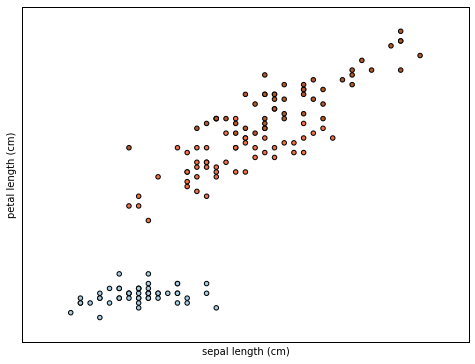

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline 

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
print iris.keys()
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 2].min() - .5, X[:, 2].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 2], c=y, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())


In this assignment, we would like to predict the length of petal by using the length of sepal. In this case, the "sepal length" is the input value and the "petal length" is the target value. In order to apply the Machine Learning algotirthm in the h2o, first we need to import the H2o library and initialization the H2o flow. See the installation document, if the "h2o" is not installed in Python.

In [2]:
import h2o
#Use help to get the details of the using function
help(h2o.init)

Help on function init in module h2o.h2o:

init(url=None, ip=None, port=None, https=None, insecure=False, username=None, password=None, cluster_name=None, proxy=None, start_h2o=True, nthreads=-1, ice_root=None, enable_assertions=True, max_mem_size=None, min_mem_size=None, strict_version_check=True, **kwargs)
    Attempt to connect to a local server, or if not successful start a new server and connect to it.
    
    :param url:
    :param ip:
    :param port:
    :param https:
    :param insecure:
    :param username:
    :param password:
    :param cluster_name:
    :param proxy:
    :param start_h2o:
    :param nthreads:
    :param ice_root:
    :param enable_assertions:
    :param max_mem_size:
    :param min_mem_size:
    :param strict_version_check:
    :param kwargs: (all other deprecated attributes)
    :returns: nothing



In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_101"; Java(TM) SE Runtime Environment (build 1.8.0_101-b13); Java HotSpot(TM) 64-Bit Server VM (build 25.101-b13, mixed mode)
  Starting server from /usr/local/h2o_jar/h2o.jar
  Ice root: /var/folders/dy/n8yy2ljj7qs1knmcrf70fsqw0000gq/T/tmp7nY6B1
  JVM stdout: /var/folders/dy/n8yy2ljj7qs1knmcrf70fsqw0000gq/T/tmp7nY6B1/h2o_jiqiongqiu_started_from_python.out
  JVM stderr: /var/folders/dy/n8yy2ljj7qs1knmcrf70fsqw0000gq/T/tmp7nY6B1/h2o_jiqiongqiu_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


If everything works, an H2o instance will be lanunch at http://localhost:54321. By taping this adress in your web browser, we can observe that the H2o Web UI is in place. We can directly develop the ML algorithm by using the Web UI. But for this assignment, we use the H2o's API for python.
![title](./h2o_flow.png)

This demo is provided by H2o, you can also entre "h2o.demo("glm")" to run this demo in your console. The demo is for a classification problem, but the principale remains the same. 

In [4]:
# Upload the prostate dataset
prostate =  h2o.import_file(path="https://h2o-public-test-data.s3.amazonaws.com/smalldata/logreg/prostate.csv")

Parse progress: |█████████████████████████████████████████████████████████████████████████████| 100%


In [5]:
# Print a description of the prostate data
prostate.summary()

,ID,CAPSULE,AGE,RACE,DPROS,DCAPS,PSA,VOL,GLEASON
type,int,int,int,int,int,int,real,real,int
mins,1.0,0.0,43.0,0.0,1.0,1.0,0.3,0.0,0.0
mean,190.5,0.402631578947,66.0394736842,1.08684210526,2.27105263158,1.10789473684,15.4086315789,15.8129210526,6.38421052632
maxs,380.0,1.0,79.0,2.0,4.0,2.0,139.7,97.6,9.0
sigma,109.840793879,0.491074338963,6.52707126917,0.308773258025,1.00010761815,0.310656449351,19.9975726686,18.3476199673,1.09195337443
zeros,0,227,0,3,0,0,0,167,2
missing,0,0,0,0,0,0,0,0,0
0,1.0,0.0,65.0,1.0,2.0,1.0,1.4,0.0,6.0
1,2.0,0.0,72.0,1.0,3.0,2.0,6.7,0.0,7.0
2,3.0,0.0,70.0,1.0,1.0,2.0,4.9,0.0,6.0


In [6]:
# Randomly split the dataset into ~70/30, training/test sets
r = prostate[0].runif()
train = prostate[r < 0.70]
test = prostate[r >= 0.70]

In [7]:
# Convert the response columns to factors (for binary classification problems)
train["CAPSULE"] = train["CAPSULE"].asfactor()
test["CAPSULE"] = test["CAPSULE"].asfactor()


In [8]:
# Build a (classification) GLM
from h2o.estimators import H2OGeneralizedLinearEstimator
prostate_glm = H2OGeneralizedLinearEstimator(family="binomial", alpha=[0.5])
prostate_glm.train(x=["AGE", "RACE", "PSA", "VOL", "GLEASON"],y="CAPSULE", training_frame=train)

glm Model Build progress: |███████████████████████████████████████████████████████████████████| 100%


In [9]:
# Show the model
prostate_glm.show()

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1473856953662_1
GLM Model: summary



,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,binomial,logit,"Elastic Net (alpha = 0.5, lambda = 4.435E-4 )",5,5,4,py_4_sid_9b7a




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.178271976724
RMSE: 0.422222662494
LogLoss: 0.527514252855
Null degrees of freedom: 259
Residual degrees of freedom: 254
Null deviance: 354.862744265
Residual deviance: 274.307411485
AIC: 286.307411485
AUC: 0.798778644416
Gini: 0.597557288832
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.324184821812: 


,0,1,Error,Rate
0,96.0,53.0,0.3557,(53.0/149.0)
1,21.0,90.0,0.1892,(21.0/111.0)
Total,117.0,143.0,0.2846,(74.0/260.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3241848,0.7086614,142.0
max f2,0.1793363,0.8143075,212.0
max f0point5,0.5677960,0.7108434,75.0
max accuracy,0.5062028,0.7384615,92.0
max precision,0.9888923,1.0,0.0
max recall,0.1003694,1.0,242.0
max specificity,0.9888923,1.0,0.0
max absolute_mcc,0.4822589,0.4614783,102.0
max min_per_class_accuracy,0.4319229,0.7114094,121.0
max mean_per_class_accuracy,0.4516746,0.7293972,111.0


Gains/Lift Table: Avg response rate: 42.69 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0115385,0.9821549,2.3423423,2.3423423,1.0,1.0,0.0270270,0.0270270,134.2342342,134.2342342
,2,0.0230769,0.9661381,2.3423423,2.3423423,1.0,1.0,0.0270270,0.0540541,134.2342342,134.2342342
,3,0.0307692,0.9548820,2.3423423,2.3423423,1.0,1.0,0.0180180,0.0720721,134.2342342,134.2342342
,4,0.0423077,0.9422233,2.3423423,2.3423423,1.0,1.0,0.0270270,0.0990991,134.2342342,134.2342342
,5,0.05,0.9285748,2.3423423,2.3423423,1.0,1.0,0.0180180,0.1171171,134.2342342,134.2342342
,6,0.1,0.8568971,2.1621622,2.2522523,0.9230769,0.9615385,0.1081081,0.2252252,116.2162162,125.2252252
,7,0.15,0.7307997,1.8018018,2.1021021,0.7692308,0.8974359,0.0900901,0.3153153,80.1801802,110.2102102
,8,0.2,0.6530328,1.2612613,1.8918919,0.5384615,0.8076923,0.0630631,0.3783784,26.1261261,89.1891892
,9,0.3,0.5646024,1.6216216,1.8018018,0.6923077,0.7692308,0.1621622,0.5405405,62.1621622,80.1801802
,10,0.4,0.4808273,1.1711712,1.6441441,0.5,0.7019231,0.1171171,0.6576577,17.1171171,64.4144144



Scoring History: 


,timestamp,duration,iteration,negative_log_likelihood,objective
,2016-09-14 14:45:09,0.000 sec,0,177.4313721,0.6824284
,2016-09-14 14:45:09,0.172 sec,1,140.7453383,0.5417682
,2016-09-14 14:45:09,0.206 sec,2,137.3005519,0.5287510
,2016-09-14 14:45:09,0.249 sec,3,137.1549538,0.5282564
,2016-09-14 14:45:09,0.332 sec,4,137.1537057,0.5282552


In [10]:
# Predict on the test set and show the first ten predictions
predictions = prostate_glm.predict(test)
predictions.show()


glm prediction progress: |████████████████████████████████████████████████████████████████████| 100%


predict,p0,p1
0,0.73903,0.26097
1,0.199239,0.800761
1,0.574052,0.425948
1,0.638726,0.361274
0,0.944994,0.0550062
1,0.445304,0.554696
1,0.0714216,0.928578
1,0.592452,0.407548
1,0.574141,0.425859
0,0.905267,0.0947333


In [11]:
# Show default performance metrics
performance = prostate_glm.model_performance(test)
performance.show()


ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.176422197124
RMSE: 0.420026424316
LogLoss: 0.521715140997
Null degrees of freedom: 119
Residual degrees of freedom: 114
Null deviance: 158.347430806
Residual deviance: 125.211633839
AIC: 137.211633839
AUC: 0.788461538462
Gini: 0.576923076923
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.293832331011: 


,0,1,Error,Rate
0,51.0,27.0,0.3462,(27.0/78.0)
1,7.0,35.0,0.1667,(7.0/42.0)
Total,58.0,62.0,0.2833,(34.0/120.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2938323,0.6730769,60.0
max f2,0.2140532,0.7894737,77.0
max f0point5,0.5483174,0.6645570,27.0
max accuracy,0.5483174,0.7583333,27.0
max precision,0.9980830,1.0,0.0
max recall,0.0981916,1.0,104.0
max specificity,0.9980830,1.0,0.0
max absolute_mcc,0.2938323,0.4649980,60.0
max min_per_class_accuracy,0.3836897,0.7051282,51.0
max mean_per_class_accuracy,0.2938323,0.7435897,60.0


Gains/Lift Table: Avg response rate: 35.00 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0166667,0.9711541,2.8571429,2.8571429,1.0,1.0,0.0476190,0.0476190,185.7142857,185.7142857
,2,0.025,0.9233955,2.8571429,2.8571429,1.0,1.0,0.0238095,0.0714286,185.7142857,185.7142857
,3,0.0333333,0.9091811,2.8571429,2.8571429,1.0,1.0,0.0238095,0.0952381,185.7142857,185.7142857
,4,0.0416667,0.8992416,2.8571429,2.8571429,1.0,1.0,0.0238095,0.1190476,185.7142857,185.7142857
,5,0.05,0.8055963,2.8571429,2.8571429,1.0,1.0,0.0238095,0.1428571,185.7142857,185.7142857
,6,0.1,0.7173722,1.4285714,2.1428571,0.5,0.75,0.0714286,0.2142857,42.8571429,114.2857143
,7,0.15,0.6143368,0.9523810,1.7460317,0.3333333,0.6111111,0.0476190,0.2619048,-4.7619048,74.6031746
,8,0.2,0.5608499,2.8571429,2.0238095,1.0,0.7083333,0.1428571,0.4047619,185.7142857,102.3809524
,9,0.3,0.4921527,1.6666667,1.9047619,0.5833333,0.6666667,0.1666667,0.5714286,66.6666667,90.4761905
,10,0.4,0.4148725,0.7142857,1.6071429,0.25,0.5625,0.0714286,0.6428571,-28.5714286,60.7142857


Question 1
------------
Please convert your demo for the iris data set. First we need to merge the input and the target into a data frame. In this assignment, we would like to predict the length of petal by using the length of sepal. 

In [36]:
import pandas as pd
iris_df=pd.DataFrame(X[:, [0,2]],columns=[iris.feature_names[0],iris.feature_names[2]])
iris_h2o=h2o.H2OFrame(iris_df) 

Parse progress: |█████████████████████████████████████████████████████████████████████████████| 100%


In [45]:
iris_h2o.summary()

,C1,C2
type,real,real
mins,4.3,1.0
mean,5.84333333333,3.75866666667
maxs,7.9,6.9
sigma,0.828066127978,1.76442041995
zeros,0,0
missing,0,0
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3


As we can see the colname of h2o data frame is lost, to get a better understand of your data frame you can reset the colnames.

In [48]:
iris_h2o.set_names([iris.feature_names[0],iris.feature_names[2]])
iris_h2o.summary()

,sepal length (cm),petal length (cm)
type,real,real
mins,4.3,1.0
mean,5.84333333333,3.75866666667
maxs,7.9,6.9
sigma,0.828066127978,1.76442041995
zeros,0,0
missing,0,0
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3


We note that our problem is a regression problem. 
Using help() to give a more details of the H2OGeneralizedLinearEstimator function.

In [28]:
#help(H2OGeneralizedLinearEstimator)